<a href="https://colab.research.google.com/github/shitzkhn/meme_classifier/blob/master/memeclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
folder = 'memes'
file = 'url_memes.txt'

In [0]:
folder = 'simple'
file = 'url_images.txt'

In [0]:
path = Path()
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['memes','simple']

In [8]:
download_images(path/file, dest, max_pics=200)

Removing Images that can't be opened

In [10]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

memes


cannot identify image file <_io.BufferedReader name='memes/00000118.jpg'>
cannot identify image file <_io.BufferedReader name='memes/00000172.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='memes/00000007.jpg'>
cannot identify image file <_io.BufferedReader name='memes/00000186.png'>
cannot identify image file <_io.BufferedReader name='memes/00000097.jpeg'>
cannot identify image file <_io.BufferedReader name='memes/00000177.jpg'>
simple


cannot identify image file <_io.BufferedReader name='simple/00000125.jpg'>
cannot identify image file <_io.BufferedReader name='simple/00000179.jpg'>
cannot identify image file <_io.BufferedReader name='simple/00000155.jpg'>
cannot identify image file <_io.BufferedReader name='simple/00000194.jpg'>
cannot identify image file <_io.BufferedReader name='simple/00000092.jpeg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='simple/00000198.jpg'>
cannot identify image file <_io.BufferedReader name='simple/00000090.jpg'>
cannot identify image file <_io.BufferedReader name='simple/00000093.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['memes', 'simple']

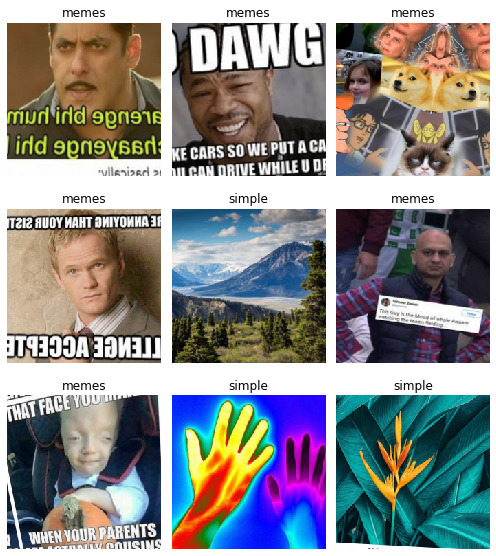

In [13]:
data.show_batch(rows=3, figsize=(7,8))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['memes', 'simple'], 2, 306, 76)

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 53.7MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.951036,1.049443,0.328947,01:40
1,0.515685,0.403420,0.078947,01:41
2,0.364284,0.151133,0.013158,01:38
3,0.272261,0.117805,0.026316,01:38


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


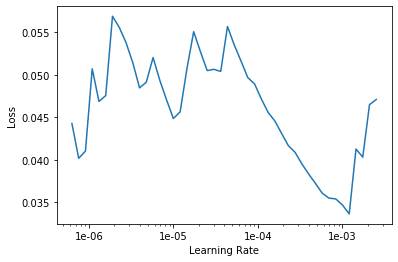

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.055721,0.043938,0.026316,02:16
1,0.073583,0.027851,0.013158,02:15


In [0]:
learn.save('stage-2')

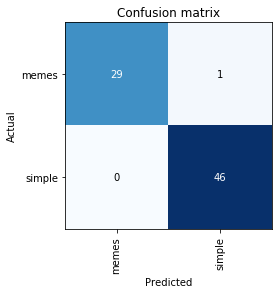

In [24]:
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()